In [29]:
# 载入sklearn数据集
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# 载入鸢尾花数据集
x_true = datasets.load_iris().data.astype("float64")
y_true = datasets.load_iris().target.reshape(-1, 1).astype("float64")

In [40]:
def PCA_DATA(x_true):
    x_true -= np.mean(x_true, axis=0)# 去均值化，求每一列的平均值，然后减去  
    C= np.dot(x_true.T, x_true) / x_true.shape[0]   # 求解矩阵C=1/n*(x_true.T*x_true)
    # 对协方差矩阵进行SVD分解
    U, S, V = np.linalg.svd(C)
    x_true_rot = np.dot(x_true, U)#仅取前两维数据，从一个五维数据变成了二维数据 
    #x_true_rot = np.dot(x_true, U.T[:1].T)#仅取前两维数据，从五维数据降低变成了一维数据 
    return x_true_rot


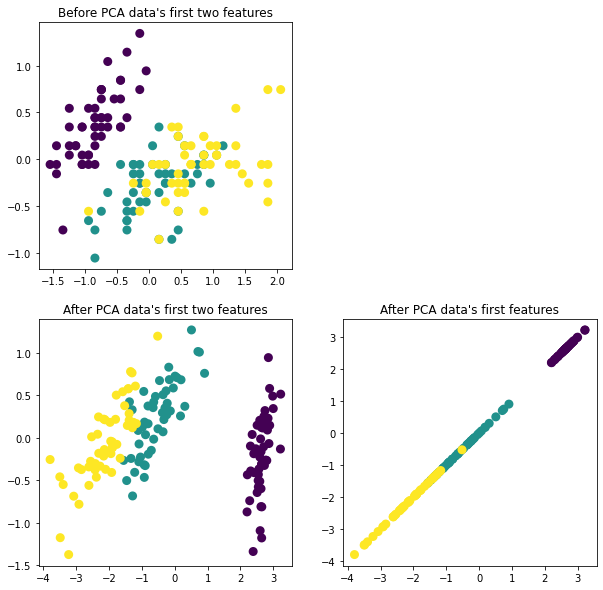

In [41]:
# 原始数据的前两维features
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.title("Before PCA data's first two features")
plt.scatter(x_true[:, 0], x_true[:, 1], c= y_true.reshape(y_true.shape[0], ), lw= 3)

# 利用自定义PCA模块处理数据
x_true_rot = PCA_DATA(x_true)

# PCA处理后数据的前两维features
plt.subplot(223)
plt.title("After PCA data's first two features")
plt.scatter(x_true_rot[:, 0], x_true_rot[:, 1], c= y_true.reshape(y_true.shape[0], ), lw= 3)

# PCA处理后数据的一维features
plt.subplot(224)
plt.title("After PCA data's first features")
plt.scatter(x_true_rot[:, 0], x_true_rot[:, 0], c= y_true.reshape(y_true.shape[0], ), lw= 3)